In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np


In [2]:
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:>

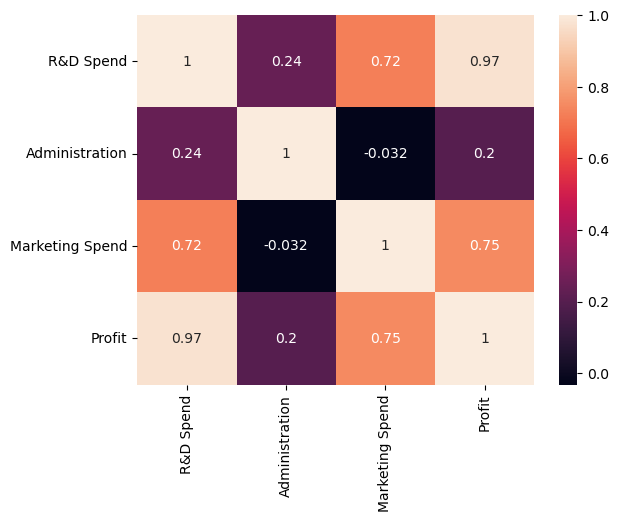

In [12]:
sns.heatmap(data.corr(),annot=True)

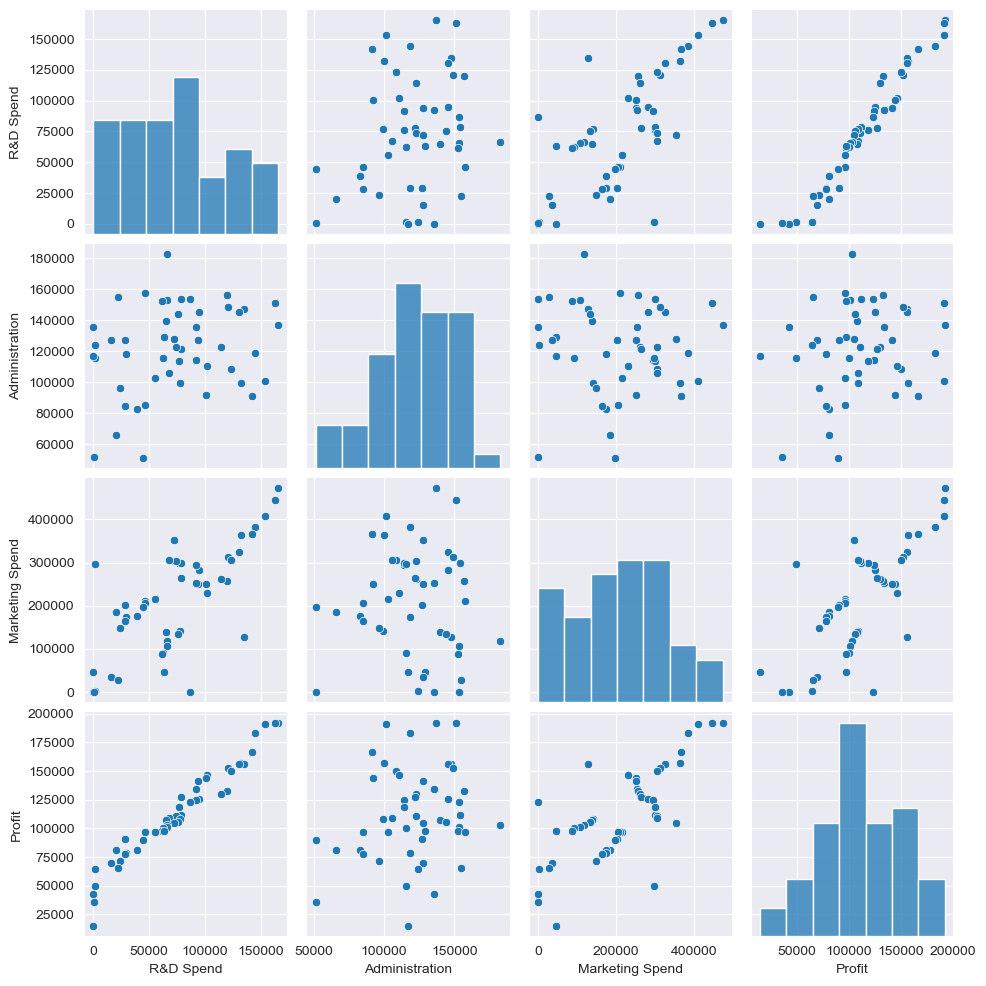

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [14]:
data = data.rename({'R&D Spend':'RDS','Administration':'Admin','Marketing Spend':'MS','Profit':'PFT'},axis = 1)
data.head()

,RDS,Admin,MS,State,PFT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
states = pd.get_dummies(data['State'], drop_first=True)

In [16]:
data = data.drop(['State'], axis=1)


In [17]:
data.corr()

,RDS,Admin,MS,PFT
RDS,1.000000,0.241955,0.724248,0.972900
Admin,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
PFT,0.972900,0.200717,0.747766,1.000000


In [18]:
model=smf.ols("PFT~RDS+Admin+MS",data=data).fit()
model.rsquared

0.9507459940683246

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PFT   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           4.53e-30
Time:                        21:36:53   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# VIF

In [20]:
rsq_RDS = smf.ols("RDS~Admin+MS",data = data).fit().rsquared
vif_RDS = 1/(1-rsq_RDS)
rsq_Admin = smf.ols("Admin~RDS+MS",data = data).fit().rsquared
vif_Admin = 1/(1-rsq_Admin)
rsq_MS = smf.ols("MS~Admin+RDS",data = data).fit().rsquared
vif_MS = 1/(1-rsq_MS)
d1 = {'Variables':['RDS','Admin','MS'],'VIF':[vif_RDS,vif_Admin,vif_MS]}
vif_Frame = pd.DataFrame(d1)
vif_Frame

,Variables,VIF
0,RDS,2.468903
1,Admin,1.175091
2,MS,2.326773


In [39]:
print(smf.ols('PFT~RDS+Admin',data=data).fit().rsquared)
print(smf.ols('PFT~RDS+MS',data=data).fit().rsquared)

0.9478129385009173
0.9504503015559763


In [57]:
model=smf.ols('PFT~RDS+MS',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PFT   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           2.16e-31
Time:                        21:59:07   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RDS            0.7966      0.041     19.266      0.000       0.713       0.880
MS             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#checking for normality of  residuals by qq plot 
plt.hist(model.resid,bins=20

(array([1., 0., 0., 0., 0., 0., 2., 0., 1., 1., 3., 9., 7., 7., 4., 4., 3.,
        4., 2., 2.]),
 array([-33645.49446186, -31108.39443777, -28571.29441367, -26034.19438958,
        -23497.09436548, -20959.99434138, -18422.89431729, -15885.79429319,
        -13348.6942691 , -10811.594245  ,  -8274.49422091,  -5737.39419681,
         -3200.29417271,   -663.19414862,   1873.90587548,   4411.00589957,
          6948.10592367,   9485.20594777,  12022.30597186,  14559.40599596,
         17096.50602005]),
 <BarContainer object of 20 artists>)

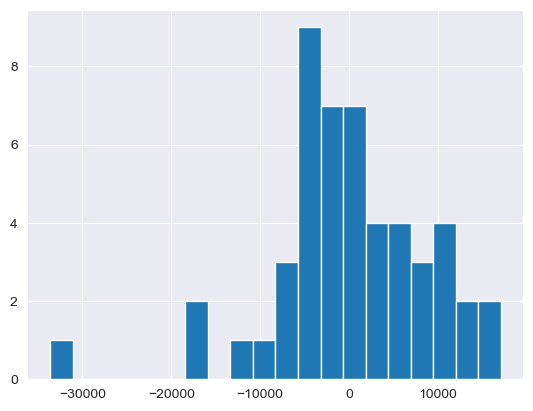

In [58]:
# Test for Normality of Residuals (Q-Q Plot)
plt.hist(model.resid,bins=20)

{'whiskers': [<matplotlib.lines.Line2D at 0x202d1d501c0>,
 'caps': [<matplotlib.lines.Line2D at 0x202d1d50760>,
 'boxes': [<matplotlib.lines.Line2D at 0x202d1d3eeb0>],
 'medians': [<matplotlib.lines.Line2D at 0x202d1d50d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x202d1d50fd0>],
 'means': []}

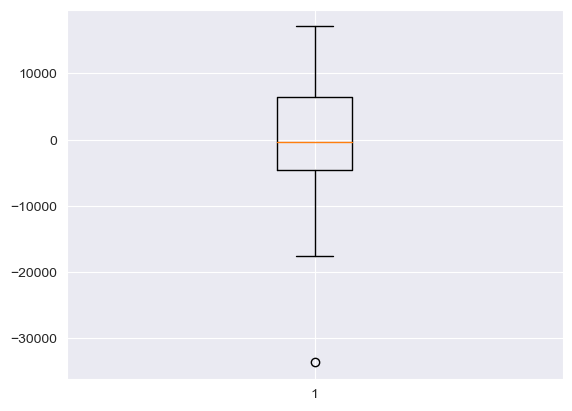

In [59]:
plt.boxplot(model.resid)

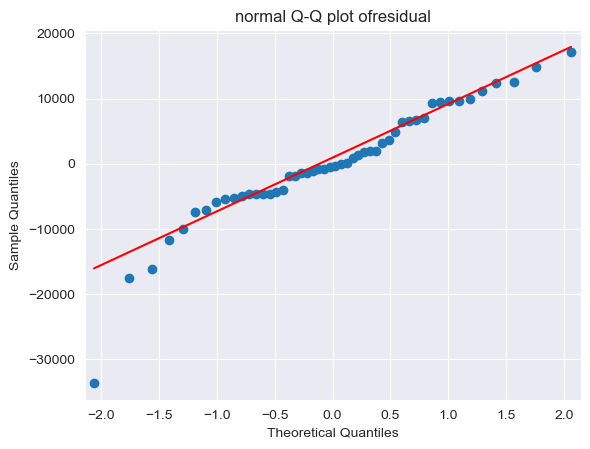

In [60]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('normal Q-Q plot ofresidual')
plt.show()

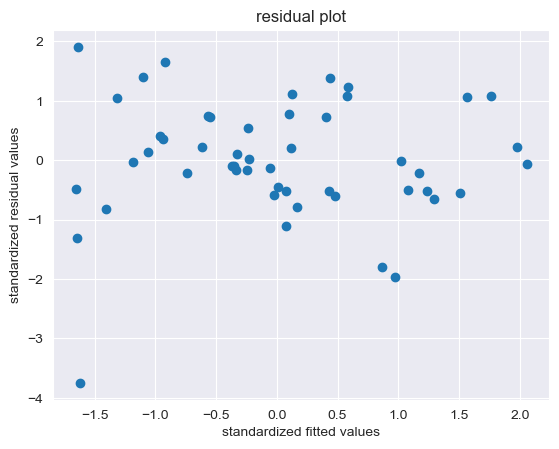

In [61]:
# Residual plot for Homoscedasticity
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('residual plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

In [62]:
#model deletion diagnostics (checking for outliers or influencers)
#checking with cooks distance 
(c,_)= model.get_influence().cooks_distance


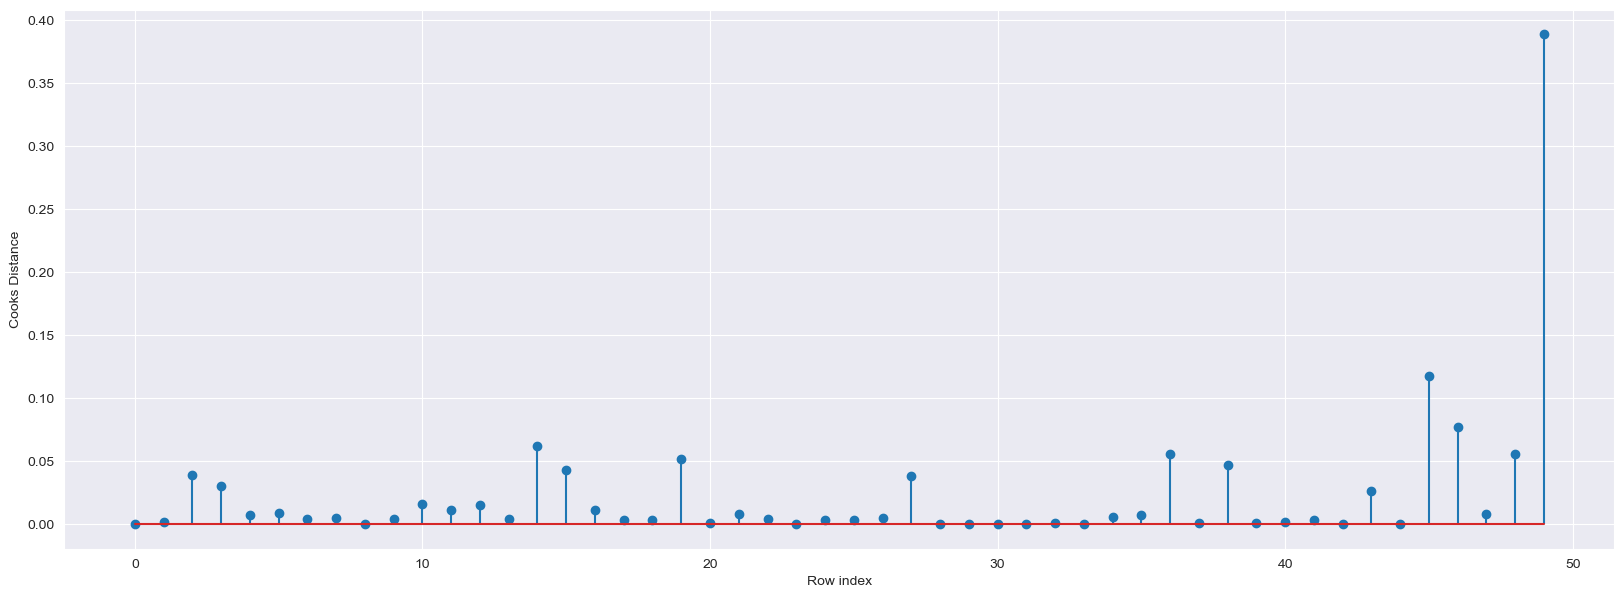

In [63]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [70]:
(np.argmax(c),np.max(c))

(49, 0.3894886227924922)

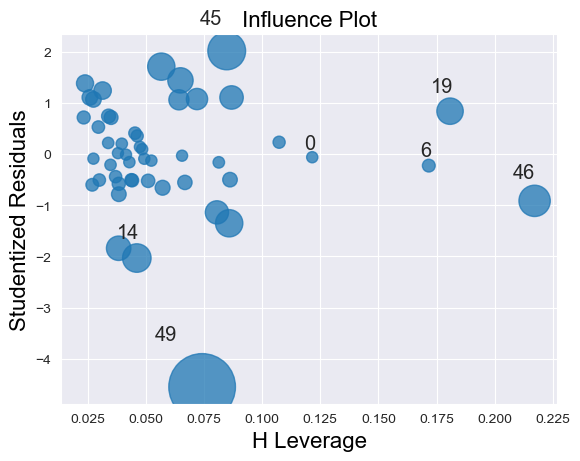

In [71]:
influence_plot(model)
plt.show()

In [72]:
# Improving the model
#Load the data
data_new = pd.read_csv("50_Startups.csv")

In [96]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data1=data_new.drop(data_new.index[[49]],axis=0).reset_index()

In [97]:
#Drop the original index
data1=data1.drop(['index'],axis=1)

In [99]:
final=smf.ols('PFT~RDS+MS',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PFT   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           2.16e-31
Time:                        22:13:31   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RDS            0.7966      0.041     19.266      0.000       0.713       0.880
MS             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
final.rsquared,final.aic

(0.9504503015559763, 1057.070772191826)

In [104]:
final.predict(data[["RDS","MS"]])

0     192800.458625
1     189774.659480
2     181405.378097
3     173441.308842
4     171127.623218
5     162879.310812
6     158028.130454
7     160455.738877
8     152317.803673
9     154343.813935
10    135011.914724
11    134638.870075
12    129218.396579
13    127812.205465
14    150192.491797
15    146032.715433
16    117025.891848
17    130829.444732
18    128882.198828
19    115816.418333
20    116650.892092
21    118384.170709
22    114990.384639
23    109886.185217
24    112552.187151
25    102612.909242
26    110990.792884
27    114978.605150
28    103125.012760
29    102440.424090
30     99085.219562
31     98314.548854
32     98864.662254
33     97600.730445
34     90262.641219
35     89776.494285
36     75824.233912
37     87974.014518
38     68631.318323
39     82924.815275
40     75049.056031
41     74113.888705
42     70234.250574
43     60390.232852
44     65489.729308
45     47829.573980
46     56909.800859
47     46975.864221
48     47407.652602
49     48326.894462
